# Uso de librería Panda

Forma en que se carga un csv local

In [121]:
import pandas as pd

data=pd.read_csv("./csv prueba.csv")
data.columns

Index(['COD_SIM', 'ID_EST', 'NTS_LEC_10', 'NTS_MAT_10', 'RAN_NOT_10',
       'NTS_LEC_11', 'NTS_MAT_11', 'RAN_NOT_11', 'TEXTO 1', 'TEXTO 2',
       'TEXTO 3', 'TEXTO 4', 'NTS_LEC_10.1', 'NTS_MAT_10.1', 'RAN_NOT_10.1',
       'NTS_LEC_11.1', 'NTS_MAT_11.1', 'RAN_NOT_11.1', 'NTS_LEC_10.2',
       'NTS_MAT_10.2', 'NTS_LEC_11.2', 'NTS_MAT_11.2',
       'Constante 0-5 para 0-10', 'Comparador 0-10', 'NTS_LEC_10.3',
       'NTS_MAT_10.3', 'NTS_LEC_11.3', 'NTS_MAT_11.3', 'Unnamed: 28',
       'Unnamed: 29', 'NTS_LEC_10.4', 'CUAL_NTS_LEC_10',
       'CUAN_CON_PROM_NTS_LEC_10', 'NTS_MAT_10.4', 'CUAL_NTS_MAT_10',
       'CUAN_CON_PROM_NTS_MAT_10', 'RAN_NOT_10.2', 'NTS_LEC_11.4',
       'CUAL_NTS_LEC_10.1', 'CUAN_CON_PROM_NTS_LEC_10.1', 'NTS_MAT_11.4',
       'CUAL_NTS_MAT_11', 'CUAN_CON_PROM_NTS_MAT_11', 'RAN_NOT_11.2',
       'SUPERIOR', 'ALTO', 'BASICO', 'BAJO'],
      dtype='object')

## Seleccionando columnas específicas

In [122]:
df=pd.DataFrame(data,columns=["COD_SIM","CUAL_NTS_LEC_10","CUAL_NTS_MAT_10","CUAL_NTS_LEC_10.1","CUAL_NTS_MAT_11"])
df.head()
#df.info()

,COD_SIM,CUAL_NTS_LEC_10,CUAL_NTS_MAT_10,CUAL_NTS_LEC_10.1,CUAL_NTS_MAT_11
0,817001.0,ALTO,SUPERIOR,SUPERIOR,ALTO
1,270025.0,ALTO,BASICO,ALTO,BASICO
2,817007.0,NaN,NaN,NaN,NaN
3,11207001.0,BASICO,BASICO,BASICO,BASICO
4,228012.0,SUPERIOR,ALTO,SUPERIOR,SUPERIOR


In [123]:
df.iloc[550]

COD_SIM              1.5203e+07
CUAL_NTS_LEC_10          BASICO
CUAL_NTS_MAT_10          BASICO
CUAL_NTS_LEC_10.1           NaN
CUAL_NTS_MAT_11             NaN
Name: 550, dtype: object

## Usando CSVs externos:

In [124]:
from sklearn import datasets, model_selection
import numpy as np

wines=datasets.load_wine()
features=wines.data
target=wines.target

#print(features.shape)
#print(target.shape)

target=np.expand_dims(target,axis=1)

#print(target)
data=np.concatenate((features,target),axis=1)

target=np.squeeze(target)

cols=wines.feature_names
cols.append("Target")
df=pd.DataFrame(data,columns=cols)
df["Target"]=df["Target"].astype(int).astype('str')

## Graficando

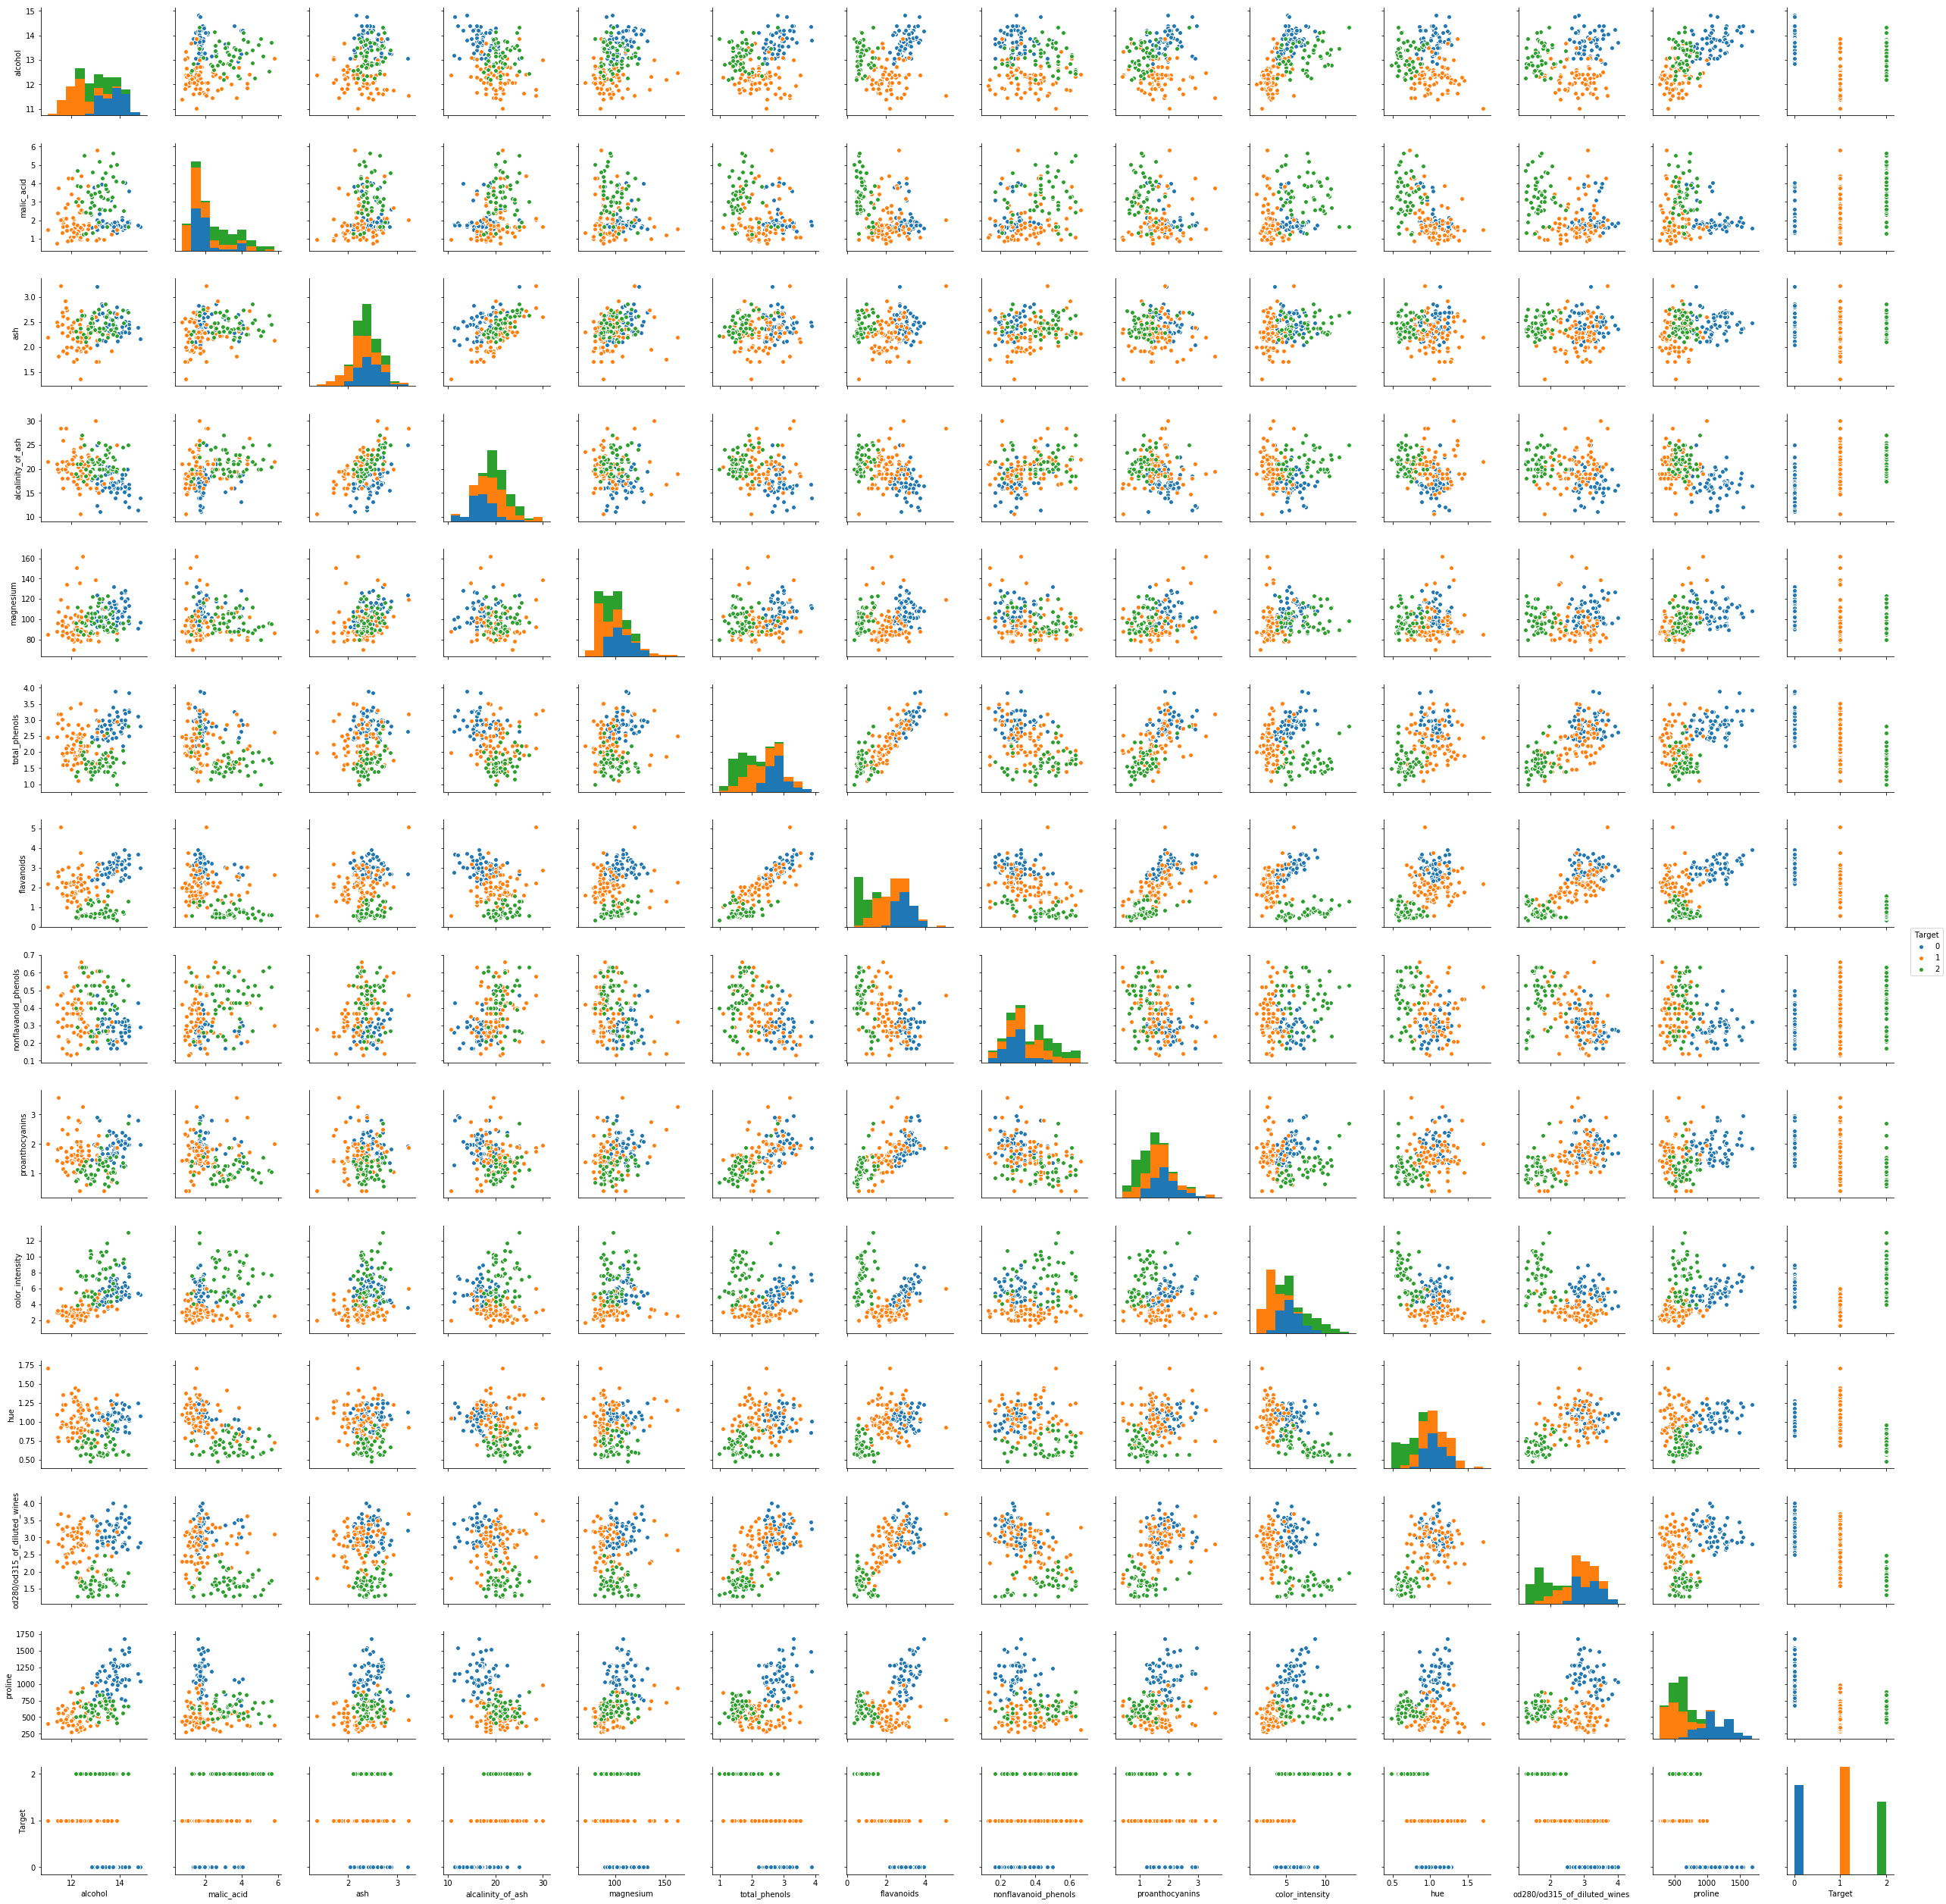

<Figure size 1296x1296 with 0 Axes>

In [125]:
import seaborn as sns 

sns.pairplot(df, hue="Target")
plt.figure(figsize=(18,18))
plt.tight_layout()
#x_train,x_test,y_train,y_test=

#dt=pd.DataFrame(wines)
#dt

# Construcción de KNN para vinos

In [150]:
from sklearn import neighbors, metrics
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.4, random_state=1234, stratify=target)

acc_test=[]
Ks=np.arange(1,100,2)
for i  in Ks:
    cf=neighbors.KNeighborsClassifier(n_neighbors=i)
    cf.fit(x_train,y_train)
    y_pred=cf.predict(x_test)
    acc_test.append(metrics.accuracy_score(y_test,y_pred))
#print(acc_test)
print("Higgest accuracy:",np.max(acc_test),"with k",acc_test.index(np.max(acc_test)))

Higgest accuracy: 0.7638888888888888 with k 7
